Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

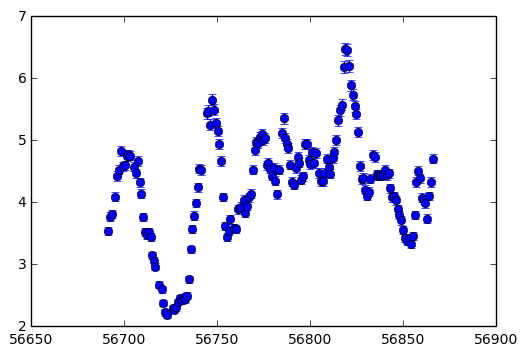

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/7647A.lc"

dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqd




array([ 0.00964867,  0.02886003,  0.0556922 ,  0.08632291,  0.13380051,
        0.20739079,  0.32145572,  0.49825637])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

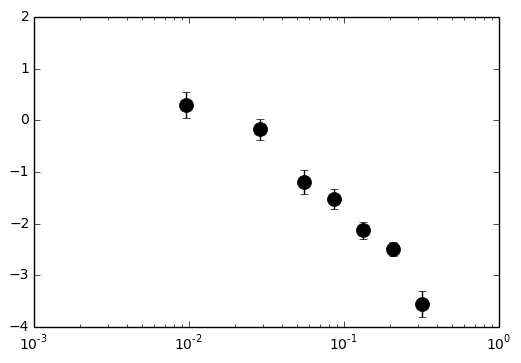

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

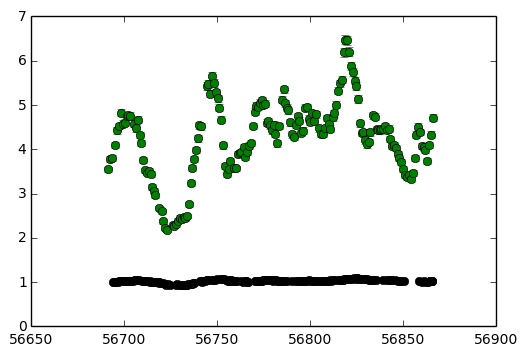

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.352e-01 7.004e+01 inf -- -2.548e+02 -- 1 1 1 1 1 1 1 1
   2 7.709e-01 6.945e+01 8.689e+01 -- -1.680e+02 -- 0.568202 0.566496 0.565546 0.565389 0.565371 0.564829 0.565108 0.56515
   3 3.365e+00 6.850e+01 8.615e+01 -- -8.181e+01 -- 0.138452 0.134629 0.131417 0.131051 0.130581 0.129376 0.130493 0.130733
   4 1.432e+00 6.742e+01 8.494e+01 -- 3.128e+00 -- -0.281314 -0.293481 -0.30187 -0.302706 -0.304046 -0.305979 -0.303068 -0.302158
   5 5.888e-01 6.660e+01 8.345e+01 -- 8.658e+01 -- -0.670439 -0.713504 -0.734283 -0.735609 -0.738394 -0.740978 -0.735503 -0.733408
   6 3.712e-01 6.580e+01 8.170e+01 -- 1.683e+02 -- -0.98186 -1.11559 -1.16661 -1.16796 -1.17265 -1.17538 -1.16791 -1.16475
   7 2.710e-01 6.441e+01 7.924e+01 -- 2.475e+02 -- -1.15319 -1.47413 -1.59924 -1.60004 -1.60675 -1.60901 -1.601 -1.59713
   8 2.138e-01 6.207e+01 7.606e+01 -- 3.236e+02 -- -1.2017 -1.73389 -2.0317 -2.03093 -2.04033 -2.04197 -2.03495 -2.02955
   9 1.767e-01 5.874e+01 7.252e+01 -- 3.961e+02 -- -1.21944 -1.84

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 6.419e+02 6.415e+02 -1.229e+00 -9.940e-01 0.854 +++
+++ 6.419e+02 6.411e+02 -1.229e+00 -8.765e-01 1.78 +++
+++ 6.419e+02 6.413e+02 -1.229e+00 -9.352e-01 1.28 +++
+++ 6.419e+02 6.414e+02 -1.229e+00 -9.646e-01 1.06 +++
+++ 6.419e+02 6.415e+02 -1.229e+00 -9.793e-01 0.954 +++
+++ 6.419e+02 6.414e+02 -1.229e+00 -9.719e-01 1.01 +++
	### errors for param 1 ###
+++ 6.419e+02 6.415e+02 -1.899e+00 -1.699e+00 0.892 +++
+++ 6.419e+02 6.410e+02 -1.899e+00 -1.599e+00 1.89 +++
+++ 6.419e+02 6.413e+02 -1.899e+00 -1.649e+00 1.35 +++
+++ 6.419e+02 6.414e+02 -1.899e+00 -1.674e+00 1.11 +++
+++ 6.419e+02 6.414e+02 -1.899e+00 -1.687e+00   1 +++
	### errors for param 2 ###
+++ 6.419e+02 6.414e+02 -3.461e+00 -3.201e+00 1.01 +++
+++ 6.419e+02 6.418e+02 -3.461e+00 -3.331e+00 0.268 +++
+++ 6.419e+02 6.417e+02 -3.461e+00 -3.266e+00 0.586 +++
+++ 6.419e+02 6.416e+02 -3.461e+00 -3.233e+00 0.788 +++
+++ 6.419e+02 6.415e+02 -3.461e+00 -3.217e+00 0.898 +++
+++ 6.419e+02 6.415e+02 -3.461

<Container object of 3 artists>

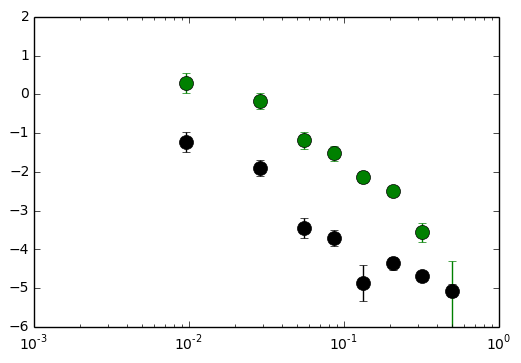

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 1.149e+03 8.511e+00 inf -- 6.871e+02 -- -0.76415 -1.33875 -2.62568 -2.91642 -3.79922 -3.72781 -4.42422 -6.83403 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 3.083e+01 1.011e+01 2.462e+00 -- 6.895e+02 -- -0.722947 -1.31306 -2.64209 -2.92939 -3.79892 -3.74348 -4.4401 -6.53403 0.112591 0.202668 0.237888 0.184561 0.247154 0.169837 0.149615 -0.977256
   5 2.313e+01 1.184e+01 2.138e+00 -- 6.917e+02 -- -0.689217 -1.28746 -2.64829 -2.93823 -3.79051 -3.75521 -4.45318 -6.83403 0.122108 0.284555 0.367997 0.266931 0.379308 0.236851 0.196816 2.03535
   7 1.836e+01 1.371e+01 1.807e+00 -- 6.935e+02 -- -0.66115 -1.2633 -2.64623 -2.94323 -3.77682 -3.76343 -4.4638 -6.53403 0.129539 0.350049 0.485494 0.345407 0.493126 0.299979 0.241096 -2.67313
   9 2.046e+01 1.572e+01 1.610e+00 -- 6.951e+02 -- -0.637504 -1.24117 -2.63838 -2.94489 -3.76048 -3.76869 -4.47217 -6.83403 0.135502 0.402878 0.588 0.418868 0.588605 0.358702 0.28198 -1.29684
  11 3.541e+01 1.788e+01 1.456e+00 -- 6.966e+02 -- -0.617387 -1.22121 -2.62

In [11]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


	### errors for param 0 ###
+++ 7.120e+02 7.118e+02 -4.752e-01 -4.717e-01 0.444 +++
+++ 7.120e+02 7.114e+02 -4.752e-01 -4.700e-01 1.35 +++
+++ 7.120e+02 7.116e+02 -4.752e-01 -4.709e-01 0.796 +++
+++ 7.120e+02 7.115e+02 -4.752e-01 -4.704e-01 1.04 +++
+++ 7.120e+02 7.116e+02 -4.752e-01 -4.706e-01 0.912 +++
+++ 7.120e+02 7.116e+02 -4.752e-01 -4.705e-01 0.975 +++
+++ 7.120e+02 7.115e+02 -4.752e-01 -4.705e-01 1.01 +++
	### errors for param 1 ###
+++ 7.120e+02 7.118e+02 -1.056e+00 -1.052e+00 0.401 +++
+++ 7.120e+02 7.115e+02 -1.056e+00 -1.049e+00 1.14 +++
+++ 7.120e+02 7.117e+02 -1.056e+00 -1.050e+00 0.702 +++
+++ 7.120e+02 7.116e+02 -1.056e+00 -1.050e+00 0.903 +++
+++ 7.120e+02 7.115e+02 -1.056e+00 -1.050e+00 1.02 +++
+++ 7.120e+02 7.116e+02 -1.056e+00 -1.050e+00 0.959 +++
+++ 7.120e+02 7.116e+02 -1.056e+00 -1.050e+00 0.988 +++
+++ 7.120e+02 7.115e+02 -1.056e+00 -1.050e+00   1 +++
	### errors for param 2 ###
+++ 7.120e+02 7.119e+02 -2.445e+00 -2.403e+00 0.347 +++
+++ 7.120e+02 7.115e+02 -2.

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 3.15567684,  3.85069114,  3.46079358,  1.80469275,  1.2276475 ,
        0.64741975,  0.33000748,  0.27290686])

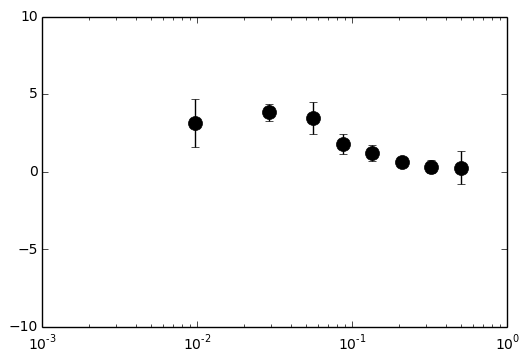

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

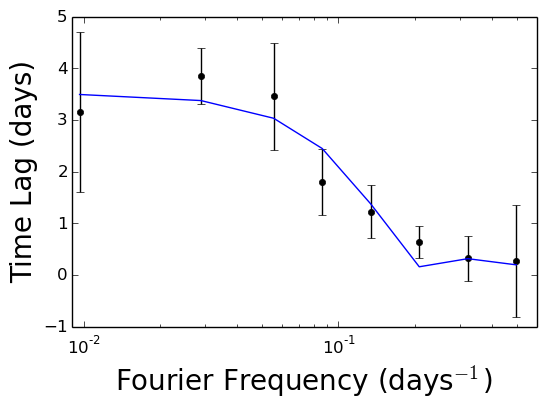

In [15]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

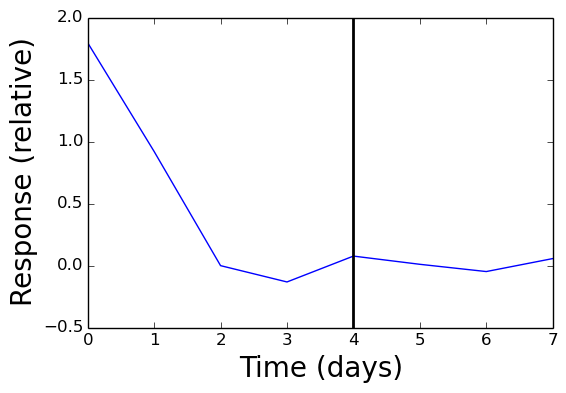

In [17]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([3.99,3.99], [-50, 50], color='k', linestyle='-', linewidth=2)